# Unsupervised Machine Learning - Clustering

### 1. Importing Libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path_name = r'/Users/geetika/Documents/Python/Global Data on Sustainable Energy'

In [4]:
df = pd.read_pickle(os.path.join(path_name, '02_Data', 'Prepared Data', 'GDSE_prepared_13thSept.pkl'))

In [5]:
pd.options.display.max_columns = None

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 22 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Country                                                           3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [7]:
columns = ['Year', 
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth',
       'gdp_per_capita','Land Area(Km2)']

df_subset = df[columns]

In [8]:
df_subset.head()

,Year,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Land Area(Km2)
0,2000,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,652230.0
1,2001,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,652230.0
2,2002,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,652230.0
3,2003,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,652230.0
4,2004,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,652230.0


In [9]:
df.isnull().sum()

Country                                                                0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [10]:
df_subset.dropna(inplace = True)

/var/folders/7w/cp4_h97s3bd3qx9ww9ss1g_r0000gn/T/ipykernel_20244/3215058805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.dropna(inplace = True)


In [11]:
df_subset.isnull().sum()

Year                                                           0
Electricity from fossil fuels (TWh)                            0
Electricity from nuclear (TWh)                                 0
Electricity from renewables (TWh)                              0
Low-carbon electricity (% electricity)                         0
Primary energy consumption per capita (kWh/person)             0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)    0
Value_co2_emissions_kt_by_country                              0
gdp_growth                                                     0
gdp_per_capita                                                 0
Land Area(Km2)                                                 0
dtype: int64

### 2. The Elbow Technique

In [12]:
# Defining the potential clusters in the data.
num_cl = range(1, 10) 

# Defining k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [13]:
# Creating a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_subset).score(df_subset) for i in range(len(kmeans))] 

score

[-1.0321227192059136e+16,
 -2114980583699523.0,
 -1214584952171761.0,
 -600855245901282.0,
 -450391223992349.9,
 -309376351701598.9,
 -236412168789074.3,
 -185178651325626.8,
 -140987071281111.38]

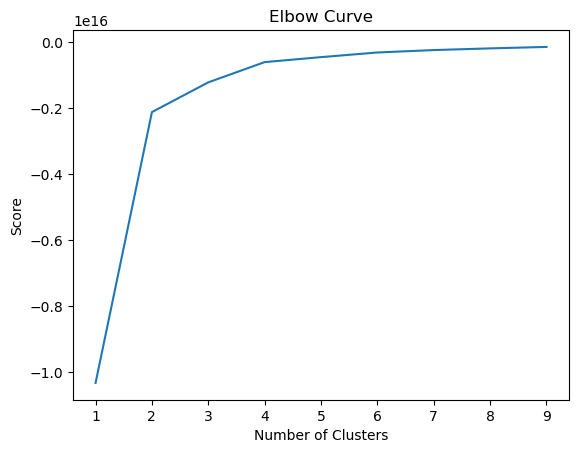

In [14]:
# Plotting the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 3. k-means Clustering

In [15]:
# Creating the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [16]:
# Fitting the k-means object to the data.

kmeans.fit(df_subset)

KMeans(n_clusters=4)

In [17]:
df_subset['clusters'] = kmeans.fit_predict(df_subset)

/var/folders/7w/cp4_h97s3bd3qx9ww9ss1g_r0000gn/T/ipykernel_20244/2632181828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['clusters'] = kmeans.fit_predict(df_subset)


In [18]:
df_subset.head()

,Year,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Land Area(Km2),clusters
3,2003,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,652230.0,2
4,2004,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,652230.0,2
5,2005,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,652230.0,2
6,2006,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,652230.0,2
7,2007,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,652230.0,2


In [19]:
df_subset['clusters'].value_counts()

2    2543
0     340
3      61
1      39
Name: clusters, dtype: int64

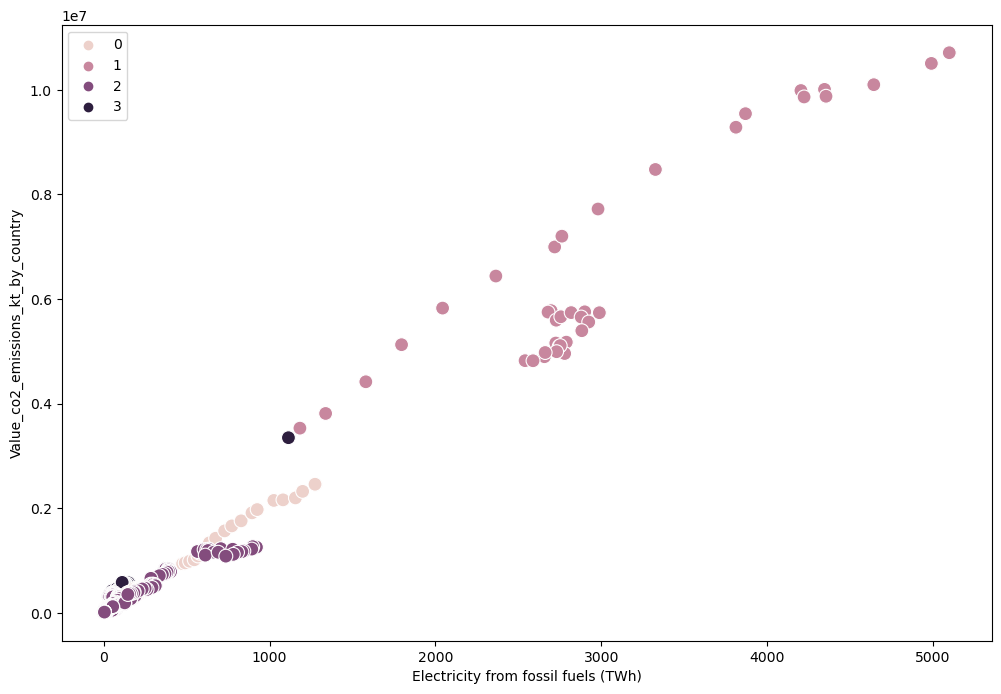

In [20]:
# Plotting the clusters for the "Electricity from fossil fuels (TWh)" and "Value_co2_emissions_kt_by_country" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset['Electricity from fossil fuels (TWh)'], y=df_subset['Value_co2_emissions_kt_by_country'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Electricity from fossil fuels (TWh)') # Label x-axis.
plt.ylabel('Value_co2_emissions_kt_by_country') # Label y-axis.
plt.show()

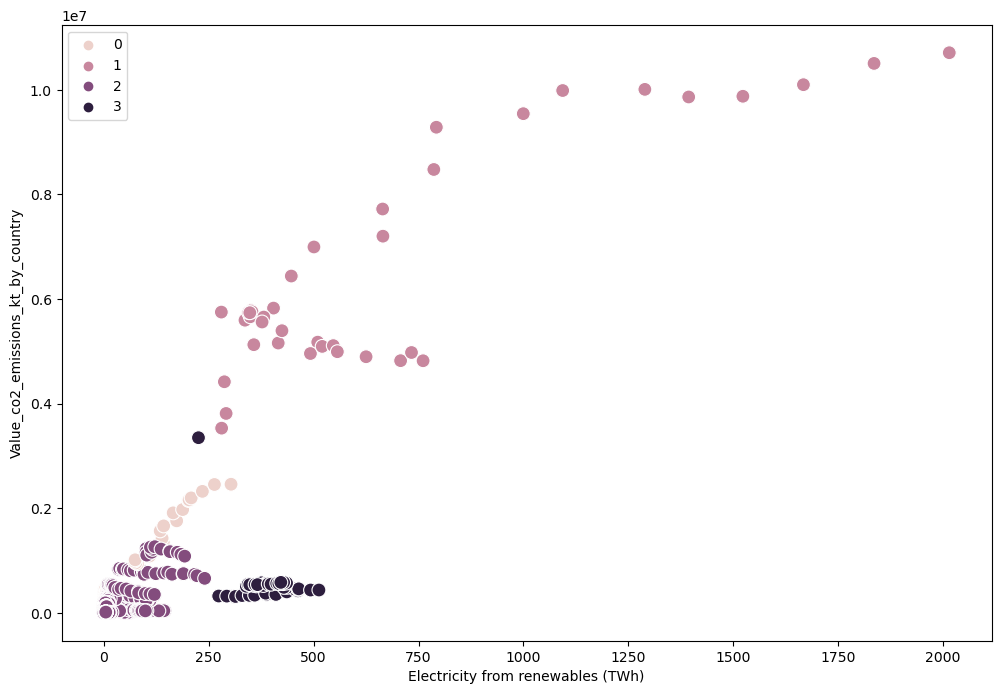

In [21]:
# Plotting the clusters for the "Electricity from renewables (TWh)" and "Value_co2_emissions_kt_by_country" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset['Electricity from renewables (TWh)'], y=df_subset['Value_co2_emissions_kt_by_country'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Electricity from renewables (TWh)') # Label x-axis.
plt.ylabel('Value_co2_emissions_kt_by_country') # Label y-axis.
plt.show()

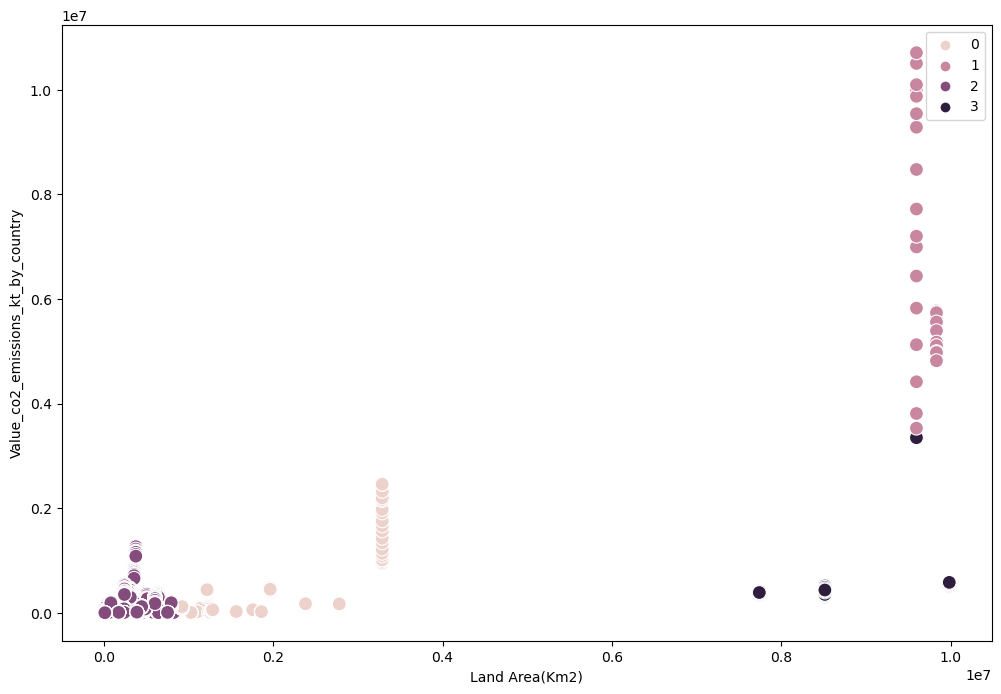

In [22]:
# Plotting the clusters for the "Land Area(Km2)" and "Value_co2_emissions_kt_by_country" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset['Land Area(Km2)'], y=df_subset['Value_co2_emissions_kt_by_country'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Land Area(Km2)') # Label x-axis.
plt.ylabel('Value_co2_emissions_kt_by_country') # Label y-axis.
plt.show()

In [23]:
df_subset.loc[df_subset['clusters'] == 3, 'cluster'] = 'black'
df_subset.loc[df_subset['clusters'] == 2, 'cluster'] = 'dark purple'
df_subset.loc[df_subset['clusters'] == 1, 'cluster'] = 'purple'
df_subset.loc[df_subset['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/7w/cp4_h97s3bd3qx9ww9ss1g_r0000gn/T/ipykernel_20244/3731464910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.loc[df_subset['clusters'] == 3, 'cluster'] = 'black'


In [24]:
df_subset.groupby('cluster').agg({'Electricity from fossil fuels (TWh)':['mean', 'median'], 
                         'Land Area(Km2)':['mean', 'median'], 
                         'Value_co2_emissions_kt_by_country':['mean', 'median']})

Electricity from fossil fuels (TWh)           Land Area(Km2)  \
                                           mean    median           mean   
cluster                                                                    
black                                150.629508   136.580   8.761150e+06   
dark purple                           26.162662     2.470   1.833823e+05   
pink                                  84.327853     8.925   1.608164e+06   
purple                              2996.153846  2762.290   9.718271e+06   

                       Value_co2_emissions_kt_by_country                
                median                              mean        median  
cluster                                                                 
black        8515770.0                      4.863926e+05  3.979300e+05  
dark purple    89342.0                      5.479415e+04  8.250000e+03  
pink         1284000.0                      1.814309e+05  4.156000e+04  
purple       9833517.0                      6.563515e+06  5.736320e+06

In the CO2 emissions vs. electricity from fossil fuels plot, all the clusters follow a more linear and are not closely gathered together. The purple group (coded ‘1’ in the legend) has an interesting feature as in it has a clump of dots (from 2500 TWh to 3000 TWh) as well as dots that follow a linear path (from 1200 TWh to 5200 TWh). This cluster has the widest spread - the higher the electricity generated from fossil fuels, the higher the CO2 emissions. The dark purple dots (coded ‘2’ in the legend) are not obvious visible eventhough they are a unique cluster.

In the CO2 emissions vs. electricity from renewables plot, the pink cluster (coded ‘1’ in the legend), represents the countries that generate the least amount of electricity and CO2 emissions. The dark purple cluster (coded ‘2’ in the legend) depicts countries that generate more electricity from renewables but still generate the lowest amounts of CO2, in some cases even better than the pink cluster. The purple cluster like in the previous case has the widest spread of all clusters.

The plot of CO2 emissions vs. land area looks completely different from the other plots. The pink cluster has the lowest land area and also the least CO2 emissions. But there are two straight lines in this plot - one in the black cluster (coded ‘3’ in the legend) and one in the purple cluster (coded ‘1’ in the legend). The show that for the same land area the CO2 emissions of various countries is increasing. If could be explored if there is some other factor, like population density, that is causing this phenomenon.